# Business Understanding


## Business Overview


In a study titled America's Generation Gap in Extramarital Affairs, 20% of older couples noted that they had cheated during their marriage. About 14% of couples under the age of 55 reported adultery in their marriage. Most people who cheat have been married for 20 to 30 years and are between the age of 50 and 60.
Since the groundbreaking study of Kinsey (1948) on human sexuality that explored the extramarital sexual behavior of American men and women, a host of factors have been examined as correlates of extramarital sexual behavior. Most prominent among these factors is the role of marital satisfaction on the extramarital activity of husbands and wives (e.g. Glass and Wright, 1977). Other correlates of extramarital sex that were found in previous studies are largely demographic and socio-economic characteristics.

## Problem Statement.


People in most cultures view sexual fidelity as one of the key foundations of a strong marital relationship. When a person engages in extramarital affairs, irrespective of the length of involvement in such an activity and whether or not the spouse is aware of it, the mutual 'trust' in 'sexual fidelity' takes an intrinsic blow. However, most people are unaware of the factors that most contribute to infidelity. This document seeks to enlighten people on the same.

## Objectives:

### General Objective:



•To determine what factor(s) contribute(s) to an individual having an extramarital affair.

### Specific Objectives:



•To determine which gender has more extramarital affairs.



•To determine which age/age bracket has more extramarital affairs.



•To investigate which education level has the highest number of extramarital affairs.



•To investigate which occupation has the highest number of extramarital affairs.

## Research Questions:



• What factor(s) contribute(s) to an individual having an extramarital affair?



• Which gender has more extramarital affairs?



• Which age/age bracket has more extramarital affairs?



• Which education level has the highest number of extramarital affairs?



• Which occupation has the highest number of extramarital affairs?

## Business Metric of Success



•Successfully determining which factor(s) contribute(s) more to extramarital affairs.

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

import scipy.stats.distributions as dist

from collections import Counter

# Loading the dataset

In [ ]:
Affairs=pd.read_csv('/content/Affairs (1).csv')

# Data description

**affairs**         : How often engaged in extramarital sexual intercourse during the past year; 0=none, 1=once, 2=twice, 3=3 times, 7= 4-10 times, 12=monthly/weekly/daily

**gender**: Male or Female

**age**: Age

**yrs_married**: Number of years married

**children**: Yes or No 

**religiousness**  : How religious, 1 = not, 2 = mildly, 3 = fairly, 4 = strongly

**education**     : Level of education, 9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 18= graduate,  20 = advanced degree

**occupation**     : 1 = student, 2=unskilled worker,farming, agriculture, 3 = semi-skilled, 4 = white-collar; 5 = teacher, counselor, social worker, nurse; artist, writers; technician, skilled worker, 6 = managerial,administrative, business, 7 = professional with advanced degree

**rating**  : How rate marriage, 1 = very poor, 2 = poor, 3 = fair, 4 = good, 5 = very good

[more info](https://drive.google.com/file/d/1L7lnXGN9UGxkaSp8RTQhHgvFJ5B9BbeX/view?usp=sharing)

# Data Exploration

In [ ]:
#checking the number of records in the data
Affairs.shape


(601, 10)

The dataset has 601 rows and 10 columns

In [ ]:
# checking the top part of the dataset
Affairs.head(4)

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.0,no,3,18,7,4
1,5,0,female,27.0,4.0,no,4,14,6,4
2,11,0,female,32.0,15.0,yes,1,12,1,4
3,16,0,male,57.0,15.0,yes,5,18,6,5


In [ ]:
# previewing the bottom part of the dataset
Affairs.tail(3)

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
598,1954,2,male,32.0,10.0,yes,2,17,6,5
599,1959,2,male,22.0,7.0,yes,3,18,6,2
600,9010,1,female,32.0,15.0,yes,3,14,1,5


In [ ]:
# checking the data types, null values and number of entries
Affairs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     601 non-null    int64  
 1   affairs        601 non-null    int64  
 2   gender         601 non-null    object 
 3   age            601 non-null    float64
 4   yearsmarried   601 non-null    float64
 5   children       600 non-null    object 
 6   religiousness  601 non-null    int64  
 7   education      601 non-null    int64  
 8   occupation     601 non-null    int64  
 9   rating         601 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 47.1+ KB


The datatypes seem okay

In [ ]:
# All variables and their values

for col in Affairs.columns:
  print(col,"\n",Affairs[col].value_counts(),"\n")
  

Unnamed: 0 
 4       1
1719    1
1726    1
1749    1
1752    1
       ..
916     1
920     1
921     1
925     1
9010    1
Name: Unnamed: 0, Length: 601, dtype: int64 

affairs 
 0     451
7      42
12     38
1      34
3      19
2      17
Name: affairs, dtype: int64 

gender 
 female    315
male      286
Name: gender, dtype: int64 

age 
 27.0    153
22.0    117
32.0    115
37.0     88
42.0     56
47.0     23
57.0     22
52.0     21
17.5      6
Name: age, dtype: int64 

yearsmarried 
 15.000    204
4.000     105
1.500      88
7.000      82
10.000     70
0.750      31
0.125      11
0.417      10
Name: yearsmarried, dtype: int64 

children 
 yes    430
no     170
Name: children, dtype: int64 

religiousness 
 4    190
2    164
3    129
5     70
1     48
Name: religiousness, dtype: int64 

education 
 14    154
16    115
18    112
17     89
20     80
12     44
9       7
Name: education, dtype: int64 

occupation 
 5    204
6    143
1    113
4     68
3     47
7     13
2     13
Name: occupa

# Data Cleaning

In [ ]:
# Droping and renaming columns
Affairs.drop(['Unnamed: 0', 'Country'],axis=1, inplace=True)
Affairs.head(1)

KeyError: ignored

The unnamed column was dropped because there was no information on what the data in the column represented.

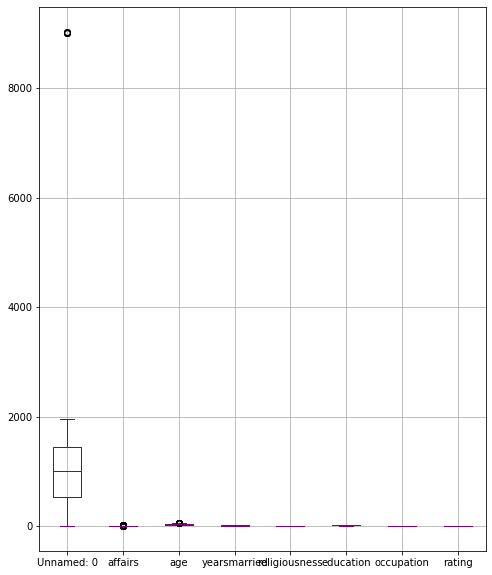

In [ ]:
# Checking for the outliers.
Affairs.boxplot(figsize=(8,10),color='purple')

From the above visualisation we can see that the dataset's outliers give insight on the affairs, number of years married for each respondent, age, education, occupation and rating.

**Observations**
* Most of the respondents record no marital affairs
* Most respondents have been married for less than 10 years
* Most of the respondent interviewed are above the age of 30
* The rest of the numerical values are code for a particular category therefore we'll get more information while doing the EDA.

In [ ]:
# Identify the missing data
Affairs.isnull().sum()

Unnamed: 0       0
affairs          0
gender           0
age              0
yearsmarried     0
children         1
religiousness    0
education        0
occupation       0
rating           0
dtype: int64

No null values found in the dataset.

In [ ]:
# Checking whether the columns are well named for ease of use
Affairs.columns

Index(['Unnamed: 0', 'affairs', 'gender', 'age', 'yearsmarried', 'children',
       'religiousness', 'education', 'occupation', 'rating'],
      dtype='object')

The columns are relatively well named

# Exploratory Data Analysis

In [ ]:
# previewing the dataset once more
Affairs.head(3)

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.0,no,3,18,7,4
1,5,0,female,27.0,4.0,no,4,14,6,4
2,11,0,female,32.0,15.0,yes,1,12,1,4


# Descriptive statistics

In [ ]:
# Getting the count, mean, standard variation, min, max and quatiles of the columns in the dataset
Affairs.describe()

,Unnamed: 0,affairs,age,yearsmarried,religiousness,education,occupation,rating
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,1059.722130,1.455907,32.487521,8.177696,3.116473,16.166389,4.194676,3.931780
std,914.904611,3.298758,9.288762,5.571303,1.167509,2.402555,1.819443,1.103179
min,4.000000,0.000000,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000
25%,528.000000,0.000000,27.000000,4.000000,2.000000,14.000000,3.000000,3.000000
50%,1009.000000,0.000000,32.000000,7.000000,3.000000,16.000000,5.000000,4.000000
75%,1453.000000,0.000000,37.000000,15.000000,4.000000,18.000000,6.000000,5.000000
max,9029.000000,12.000000,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000


**Observtions**
* the mean of <font color='green'>*age* </font>is almost equal to the median which means there are no altering outliers as we had already established
* the mean of <font color='green'>*years married* </font> is greater than the median therefore the distribution is positively skewed

In [ ]:
# Confirming the skew observation
Affairs['yearsmarried'].skew()

0.07818880071681064

The result concurs with the above statement. It is slightly positively skewed

In [ ]:
# finding out how the individuals rate their marriages
# 1 = very poor, 2 = poor, 3 = fair, 4 = good, 5 = very good
#
Affairs["rating"].value_counts()

5    232
4    194
3     93
2     66
1     16
Name: rating, dtype: int64

**Observations**

* Most of the individuals rate their marriage as very good, good, fair, poor and very poor respectively

In [ ]:
# Article used to calculate the average income for each category
# link: http://www.worldsalaries.org/usa.shtml

# create a list of our conditions
conditions = [
    (Affairs["occupation"] == 1),
    (Affairs["occupation"] == 2),
    (Affairs["occupation"] == 3),
    (Affairs["occupation"] == 4),
    (Affairs["occupation"] == 5),
    (Affairs["occupation"] == 6),
    (Affairs["occupation"] == 7)
    ]

# create a list of the values we want to assign for each condition
values = [3000, 3300, 3800, 4200, 4950, 5200, 10000]

# create a new column and use np.select to assign values to it using our lists as arguments
Affairs['income'] = np.select(conditions, values)

# display updated DataFrame
Affairs.head()

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,income
0,4,0,male,37.0,10.00,no,3,18,7,4,10000
1,5,0,female,27.0,4.00,no,4,14,6,4,5200
2,11,0,female,32.0,15.00,yes,1,12,1,4,3000
3,16,0,male,57.0,15.00,yes,5,18,6,5,5200
4,23,0,male,22.0,0.75,no,2,17,6,3,5200


In [ ]:
# Exporting cleaned dataset to excel

Affairs.to_excel('Affairs_final.xlsx')


# Univariate Analysis

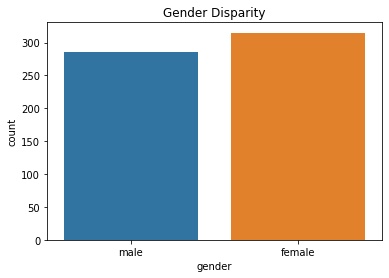

In [ ]:
# finding out the gender disparity in our dataset
sns.countplot(data=Affairs, x='gender');
plt.title("Gender Disparity");

There are more female respondents than male therefore we'll have to perform stratified random sampling to avoid bias 

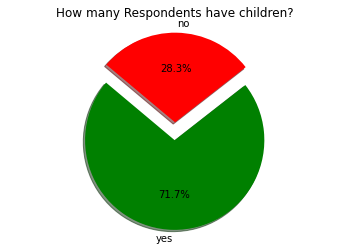

In [ ]:
# finding out what proportion of our dataset has children
plt.pie(Affairs['children'].value_counts(normalize=True), labels =Affairs['children'].value_counts().index,colors = ['Green', 'Red'], autopct = '%1.1f%%', shadow = True,explode=(0.2,0), startangle = 140)
plt.axis('equal')
plt.title('How many Respondents have children?')
plt.show()

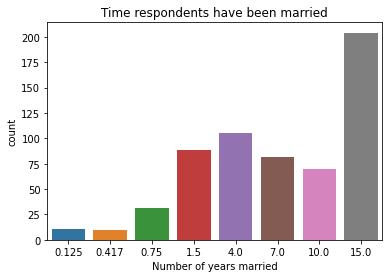

In [ ]:
# finding out how long our respondents have been married
# Number of years married:
# 0.125= 3 months or less 
# 0.417= 4-6months 
# 0.75= 6months-1year
# 1.5= 1-2years 
# 4.0= 3-5years
# 7.0= 6-8years 
# 10.0= 9-11yrs 
# 15.0= 12 or more years
sns.countplot(data=Affairs, x='yearsmarried')
plt.title("Time respondents have been married")
plt.xlabel("Number of years married")
plt.show()

* Most of our respondents have been married for 12 or more years
* Next most have been married for 3-5 years 
* The least have been maried for 4-6 months

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

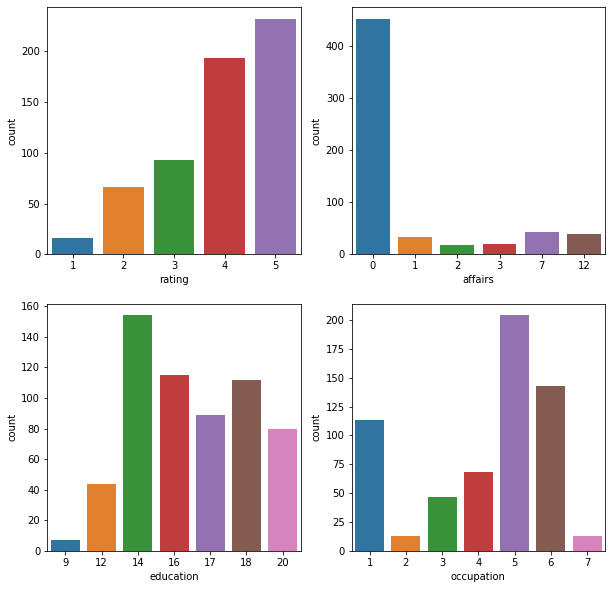

In [ ]:
# prompting system to ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# plotting countplots for the rating, affairs, education and occupation categories
fig,axes = plt.subplots(2,2, figsize=(10,10))
# plt.title("Count plots for rating, affairs, education and occupation")
sns.countplot('rating',data=Affairs,ax=axes[0,0])
sns.countplot('affairs',data=Affairs,ax=axes[0,1])
sns.countplot('education',data=Affairs,ax=axes[1,0])
sns.countplot('occupation',data=Affairs,ax=axes[1,1])
plt.show()


**Affairs**: 0 = none, 1= once, 2=twice, 3=3 times, 7=4-10 times, 12=daily-monthly
* Majority of the resopondents reported no occurence of extramarrital affairs within their marriages
* The second largest proportion reported occurrence of 4-10 times

**Education**: Level of education, 9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree
* respondents with some colledge education are the majority
* The least being those ith grade school as their highest education level


**occupation** : 1 = student, 2 = farming, agriculture semi-skilled, or unskilled worker; 3 = white-colloar; 4 = teacher, counselor, social worker, nurse; artist, writers;technician, skilled worker, 5 = managerial, administrative, business, 6 = professional with advanced degree

* most of the respondents are in managerial and administrative positions as well as business personel
* The second largest portion of the respondents are proffessionals with advanced degree
* This discovery suggests that majority of the respondents are literate

**rating** : How rate marriage, 1 = very poor, 2 = poor, 3 = fair, 4 = good, 5 = very good
*  Most of the respondents rated their marriages as very good, good, fair, poor and very poor respectively.
* this suggests that majority of the respondents are happy with their marriages.

# Bivariate Analysis

In [ ]:
# Correlation matrix

Affairs.corr()

,Unnamed: 0,affairs,age,yearsmarried,religiousness,education,occupation,rating,income
Unnamed: 0,1.000000,-0.027517,0.021503,0.055778,-0.045637,-0.056963,-0.090716,-0.014382,-0.095388
affairs,-0.027517,1.000000,0.095237,0.186842,-0.144501,-0.002437,0.049612,-0.279512,0.036341
age,0.021503,0.095237,1.000000,0.777546,0.193777,0.134596,0.166413,-0.199000,0.168810
yearsmarried,0.055778,0.186842,0.777546,1.000000,0.218261,0.040003,0.044592,-0.243119,0.066461
religiousness,-0.045637,-0.144501,0.193777,0.218261,1.000000,-0.042571,-0.039722,0.024296,-0.029826
education,-0.056963,-0.002437,0.134596,0.040003,-0.042571,1.000000,0.533605,0.109303,0.419098
occupation,-0.090716,0.049612,0.166413,0.044592,-0.039722,0.533605,1.000000,0.017422,0.849171
rating,-0.014382,-0.279512,-0.199000,-0.243119,0.024296,0.109303,0.017422,1.000000,-0.044841
income,-0.095388,0.036341,0.168810,0.066461,-0.029826,0.419098,0.849171,-0.044841,1.000000


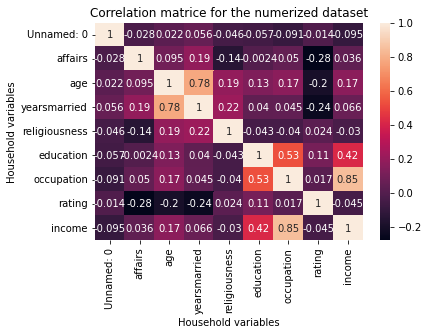

In [ ]:
# Heatmap of correlation

corr_matrix = Affairs.corr(method = 'pearson')

sns.heatmap(corr_matrix, annot = True)

plt.title("Correlation matrice for the numerized dataset")

plt.xlabel("Household variables")

plt.ylabel("Household variables")

plt.show()

The correlation matrix and correlation heatmap show that:
- "yearsmarried" and "age" are moderately correlated with r = .78
- "education" and "occupation" are also moderately correlated with r = .53
- we also look at "affairs" which is not or weakly correlated to the other variables

Look into VIF # from veronica

AxesSubplot(0.125,0.125;0.775x0.755)


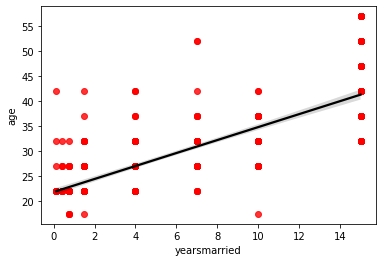

In [ ]:
# defining a function to plot regression relation between two variables

def cor(col1,col2,d):
  ans = sns.regplot(x = col1, y = col2, data = Affairs, scatter_kws = {"color": "red"}, line_kws = {"color": "black"})
  return ans

# Scatter plot of "yearsmarried" and "age"

print(cor("yearsmarried", "age", Affairs))


AxesSubplot(0.125,0.125;0.775x0.755)


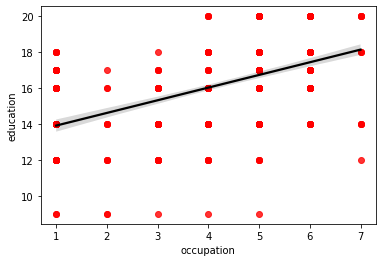

In [ ]:
# scatter plot of "occupation" and "education"

print(cor("occupation", "education", Affairs))

AxesSubplot(0.125,0.125;0.775x0.755)


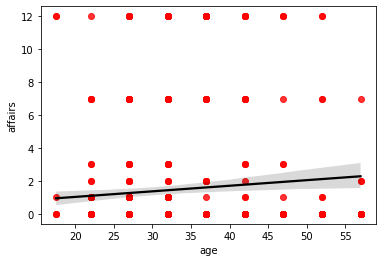

In [ ]:
# Scatter plot of "affairs" and "age"

print(cor("age", "affairs", Affairs))

AxesSubplot(0.125,0.125;0.775x0.755)


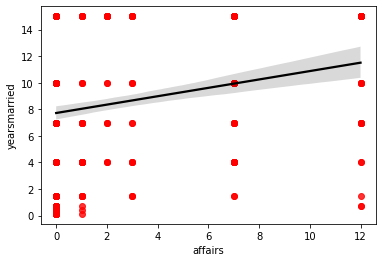

In [ ]:
# Scatter plot of "affairs" and "yearsmarried"

print(cor("affairs", "yearsmarried", Affairs))

AxesSubplot(0.125,0.125;0.775x0.755)


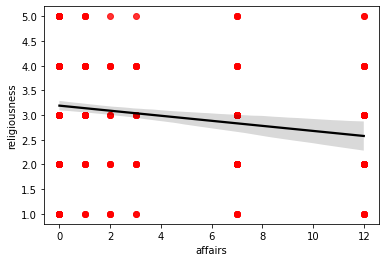

In [ ]:
# Scatter plot of "affairs" and "religiousness"

print(cor("affairs", "religiousness", Affairs))

AxesSubplot(0.125,0.125;0.775x0.755)


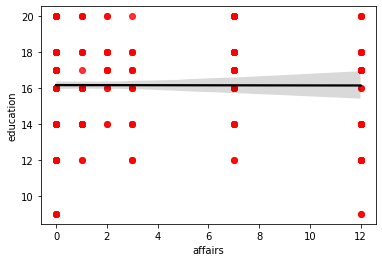

In [ ]:
# Scatter plot of "affairs" and "education"

print(cor("affairs", "education", Affairs))

AxesSubplot(0.125,0.125;0.775x0.755)


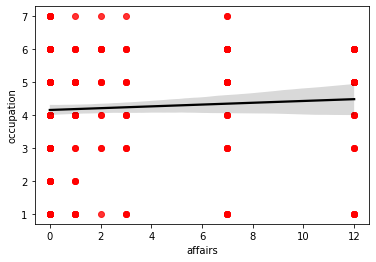

In [ ]:
# Scatter plot of "affairs" and "occupation"

print(cor("affairs", "occupation", Affairs))

AxesSubplot(0.125,0.125;0.775x0.755)


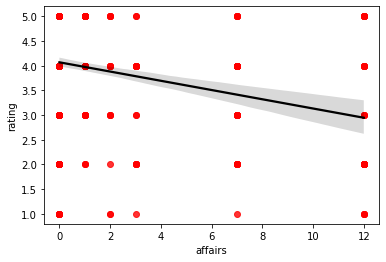

In [ ]:
# Scatter plot of "affairs" and "rating"

print(cor("affairs", "rating", Affairs))

With respect to the variable "affairs", the observation on correlations show there is weak or no correlations with other variables.

#  Multivariate Analysis

In [ ]:
# We change all values into categorical variables

Affairs_cat = Affairs.copy()

for col in Affairs_cat.columns:
    if (Affairs_cat[col].dtype != 'age'):
        Affairs_cat[col] = Affairs_cat[col].astype('category')
        Affairs_cat[col] = Affairs_cat[col].cat.codes
        
Affairs_cat.head()

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,income
0,0,0,1,4,6,0,2,5,6,3,6
1,1,0,0,2,4,0,3,2,5,3,5
2,3,0,0,3,7,1,0,1,0,3,0
3,5,0,1,8,7,1,4,5,5,4,5
4,6,0,1,1,2,0,1,4,5,2,5


We categorized all variables except "age"

In [ ]:
# Changing our target variable "affairs" into a binary variable with 
# 0 for no affair and 1 for having an affair

affairs_bin = np.where(Affairs_cat['affairs'] == 0, 0, 1)
if 'affairs_bin' not in Affairs_cat.columns:
  Affairs_cat.insert(1, "affairs_bin", affairs_bin)

Affairs_cat.head()

,Unnamed: 0,affairs_bin,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,income
0,0,0,0,1,4,6,0,2,5,6,3,6
1,1,0,0,0,2,4,0,3,2,5,3,5
2,3,0,0,0,3,7,1,0,1,0,3,0
3,5,0,0,1,8,7,1,4,5,5,4,5
4,6,0,0,1,1,2,0,1,4,5,2,5


We create a binary variable for "affairs" where 0 is no extra marital affairs and 1 is having an extra marital affair (1, 2, 3, 7, 12).

In [ ]:
# Dropping column "affairs" as we will use affairs_bin as the target variable

Affairs_cat.drop("affairs", axis = 1, inplace = True)

Affairs_cat.shape


(601, 11)

In [ ]:
# Creating dependent and independent variables

y = dependent = target =  Affairs_cat["affairs_bin"]

X = independent = predictors = Affairs_cat.loc[:,Affairs_cat.columns != "affairs_bin"]

X.head()

,Unnamed: 0,gender,age,yearsmarried,children,religiousness,education,occupation,rating,income
0,0,1,4,6,0,2,5,6,3,6
1,1,0,2,4,0,3,2,5,3,5
2,3,0,3,7,1,0,1,0,3,0
3,5,1,8,7,1,4,5,5,4,5
4,6,1,1,2,0,1,4,5,2,5


## Objective 1: Logistic Regression

In [ ]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7603993344425957

In [ ]:
y.mean()

0.24958402662229617

Only 25% of the respondents had affairs, which means that we could obtain 75% accuracy by always predicting "no". 
So our model is doing slightly better than the null error rate.

In [ ]:
# examine the coefficients
trans = np.transpose(model.coef_)
zipi = list(zip(X.columns, trans))
pd.DataFrame(zipi)

,0,1
0,Unnamed: 0,[-0.0007055382206032692]
1,gender,[0.3086571626741966]
2,age,[-0.20741162810850652]
3,yearsmarried,[0.2948328853037906]
4,children,[0.29055595096289366]
5,religiousness,[-0.3322242138064103]
6,education,[0.020568484647613627]
7,occupation,[0.005642786755693561]
8,rating,[-0.4990491619215258]
9,income,[0.0056427867556923745]


Increases in marriage rating, religiousness and age correspond to a decrease in the likelihood of having an affair. 

For the lowest likelihood of an increase in having an affair corresponds to the occupation, the education and the income.

### Model evaluation using a validation set

In [ ]:
# Splitting the dataset into train and test sets

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(420, 10)
(420,)
(181, 10)
(181,)


In [ ]:
# Building logistic model

affairs_log_model = LogisticRegression(max_iter = 1000)

X_log = affairs_log_model.fit(x_train,y_train)

In [ ]:
# Predicting y on the x_train and x_test using logistic

y_log_train_predicted=affairs_log_model.predict(x_train)

y_log_predicted=affairs_log_model.predict(x_test)

print(y_log_predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]


In [ ]:
# Checking accuracy of logistic

from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,classification_report
print("train set accuracy score: ", accuracy_score(y_train,y_log_train_predicted))
print("test set accuracy score :", accuracy_score(y_test,y_log_predicted))

train set accuracy score:  0.7547619047619047
test set accuracy score : 0.7624309392265194


The use of logistic regression is due to the target variable being a binary outcome (i.e. discrete variable) and hence logistic is the most appropriate model.

With the built model, it is possible to use the predictors (gender, age, yearsmarried, children, religiousness, occupation, education, rating and income) to predict whether an individual had an affair in the last 12 months to an accuracy of 77%.

In [ ]:
# generate class probabilities
probs = affairs_log_model.predict_proba(x_test)
print(probs)

[[0.87350154 0.12649846]
 [0.81713379 0.18286621]
 [0.65290079 0.34709921]
 [0.97628437 0.02371563]
 [0.86551353 0.13448647]
 [0.79031203 0.20968797]
 [0.70331124 0.29668876]
 [0.65524875 0.34475125]
 [0.7326855  0.2673145 ]
 [0.84104198 0.15895802]
 [0.86155345 0.13844655]
 [0.90617842 0.09382158]
 [0.70059834 0.29940166]
 [0.69102507 0.30897493]
 [0.78206983 0.21793017]
 [0.94331799 0.05668201]
 [0.88163797 0.11836203]
 [0.84820611 0.15179389]
 [0.86833971 0.13166029]
 [0.61535877 0.38464123]
 [0.78725884 0.21274116]
 [0.71213921 0.28786079]
 [0.79474422 0.20525578]
 [0.9257159  0.0742841 ]
 [0.53144274 0.46855726]
 [0.81252815 0.18747185]
 [0.73120531 0.26879469]
 [0.57567484 0.42432516]
 [0.88939449 0.11060551]
 [0.86935059 0.13064941]
 [0.55823684 0.44176316]
 [0.62082237 0.37917763]
 [0.75204125 0.24795875]
 [0.80159904 0.19840096]
 [0.73752377 0.26247623]
 [0.85483425 0.14516575]
 [0.69902292 0.30097708]
 [0.70139348 0.29860652]
 [0.86259492 0.13740508]
 [0.63754166 0.36245834]


In the class probabilities, any time the probability in the second column is above 0.5, the classifier is predicting a 1 (having an affair).

In [ ]:
# generate evaluation metrics
print(accuracy_score(y_test, y_log_predicted))


0.7624309392265194


The accuracy is 77%, which is the same as we experienced when training and predicting on the same data.

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,y_log_predicted) 

print(conf_mat)


[[130   3]
 [ 40   8]]


##Model Evaluation Using Cross-Validation

In [ ]:

from sklearn.model_selection import cross_val_score
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

Looks good. It's still performing at 77% accuracy.

# Hypothesis Testing





## Objective 2: To determine which gender has more extramarital affairs.

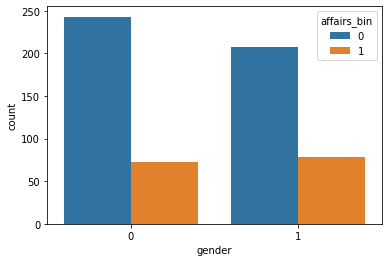

In [ ]:
# Countplot of Affairs with respect to gender

sns.countplot(x ='gender', hue = "affairs_bin", data = Affairs_cat);

Setting the null and alternative hypothesis



Proportion of male having affairs is equal to the proportion of female having affairs.


H0: p_males_affairs = p_females_affairs


H1: p_males_affairs ≠ p_females_affairs

In [ ]:
# A contingency table of total number of affairs and gender

print(pd.crosstab(Affairs_cat['affairs_bin'],Affairs_cat['gender']), "\n")

# A contingency table of proportions of affairs and gender 

print(pd.crosstab(Affairs_cat.affairs_bin,Affairs_cat.gender).apply(lambda r:r/r.sum(),axis=0))

gender         0    1
affairs_bin          
0            243  208
1             72   78 

gender              0         1
affairs_bin                    
0            0.771429  0.727273
1            0.228571  0.272727


Out of 601, 72 males and 78 females had extramarital affairs 

In [ ]:
Affairs.gender.value_counts()

female    315
male      286
Name: gender, dtype: int64

In [ ]:
sample = Affairs.groupby("gender", group_keys = False).apply(lambda strata : strata.sample(frac = 0.391))

In [ ]:
sample.gender.value_counts()

female    123
male      112
Name: gender, dtype: int64

In [ ]:
# z score for two samples with confidence level of 95% is given by

# z = [(p1 - p2) - 0]/sqrt(p(1-p)((1/n1)+(1/n2)))

p = len(sample[sample['affairs']==1])/len(sample)

sample_male = sample[sample["gender"]=="male"]

p1 = len(sample_male[sample_male['affairs']==1])/len(sample_male)

n1 = len(sample_male)

sample_female = sample[sample["gender"]=="female"]

p2 = len(sample_female[sample_female['affairs']==1])/len(sample_female)

n2 = len(sample_female)

In [ ]:
# Calculation of the z score

z = ((p1 - p2) - 0)/(p*(1-p)*((1/n1)+(1/n2)))**(1/2)

z

0.9568734736955734

In [ ]:
# P value associated with the z score obtained is given by 

from scipy.stats import norm

p_value = 2*(norm.sf(abs(z)))

p_value

0.33863112150307084

There is not enough evidence to reject the null hypothesis since the p_value is greater than the significance level alpha.

There is not a significant difference between the male proportion that have extramarital affairs and the female proportion that have extramarital affairs.

## Follow up questions 

### a) Did we have the right data?

We did not have the right data to exhaust all the questions, as it was hard to find data on extramarital affairs.

### b) Do we need other data to answer our questions?

Other data with up to date records, the income of the respondents, the state of where the respondents live is required to answer the questions in detail.

### c) Did we have the right questions?

We had  the right questions but the dataset did not contain all the required information to answer them.

## Recommendations

1. More data should be collected on extramarital affairs to aid in future analysis.

2. Data from other parts of the world other than the USA should be collected. This will provide a broader  analysis and insight on extramarital affairs.

3. Partners who choose to rebuild their relationship after an affair may consider therapy.

4. Infidelity therapists should use an integrative approach best suited to the couple seeking help from them.